In [0]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as pyplot
%matplotlib inline

In [0]:
df = web.get_data_yahoo("BTC-USD", start="2017-1-1", end="2017-12-05")

In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-02,11320.200195,10905.099609,10978.299805,11074.599609,5138500096,11074.599609
2017-12-03,11858.700195,10862.000000,11082.700195,11323.200195,6608309760,11323.200195
2017-12-04,11657.200195,11081.799805,11315.400391,11657.200195,6132409856,11657.200195
2017-12-05,12032.000000,11604.599609,11685.700195,11916.700195,6895260160,11916.700195
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000


In [4]:
df['High_shift'] = df['High'].shift()
df['Low_shift'] = df['Low'].shift()
df.head()

,High,Low,Open,Close,Volume,Adj Close,High_shift,Low_shift
Date,,,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012,NaN,NaN
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000,1003.080017,958.698975
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966,1031.390015,996.702026
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980,1044.079956,1021.599976
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005,1159.420044,1044.400024


In [0]:
def bear(df):
    return (df['Close'] - df['High_shift']) * 0.1 if df['High'] > df['High_shift'] else 0

In [0]:
df['bear'] = df.apply(bear, axis=1)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,High_shift,Low_shift,bear
Date,,,,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012,NaN,NaN,0.000000
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000,1003.080017,958.698975,1.866998
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966,1031.390015,996.702026,1.244995
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980,1044.079956,1021.599976,11.065002
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005,1159.420044,1044.400024,-14.604004


In [0]:
def bull(df):
    return ( df['Low_shift'] - df['Close']) * 0.1 if df['Low'] < df['Low_shift'] else 0

In [0]:
df['bull'] = df.apply(bull, axis=1)

In [10]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,High_shift,Low_shift,bear,bull
Date,,,,,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012,NaN,NaN,0.000000,0.000000
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000,1003.080017,958.698975,1.866998,0.000000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966,1031.390015,996.702026,1.244995,0.000000
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980,1044.079956,1021.599976,11.065002,0.000000
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005,1159.420044,1044.400024,-14.604004,3.102002


In [0]:
df['result'] = df['bear'].cumsum() + df['bull'].cumsum()

In [12]:
df

,High,Low,Open,Close,Volume,Adj Close,High_shift,Low_shift,bear,bull,result
Date,,,,,,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012,NaN,NaN,0.000000,0.000000,0.000000
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000,1003.080017,958.698975,1.866998,0.000000,1.866998
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966,1031.390015,996.702026,1.244995,0.000000,3.111993
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980,1044.079956,1021.599976,11.065002,0.000000,14.176996
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005,1159.420044,1044.400024,-14.604004,3.102002,2.674994
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-02,11320.200195,10905.099609,10978.299805,11074.599609,5138500096,11074.599609,11046.700195,9694.650391,2.789941,0.000000,640.485315
2017-12-03,11858.700195,10862.000000,11082.700195,11323.200195,6608309760,11323.200195,11320.200195,10905.099609,0.300000,-41.810059,598.975256
2017-12-04,11657.200195,11081.799805,11315.400391,11657.200195,6132409856,11657.200195,11858.700195,10862.000000,0.000000,0.000000,598.975256


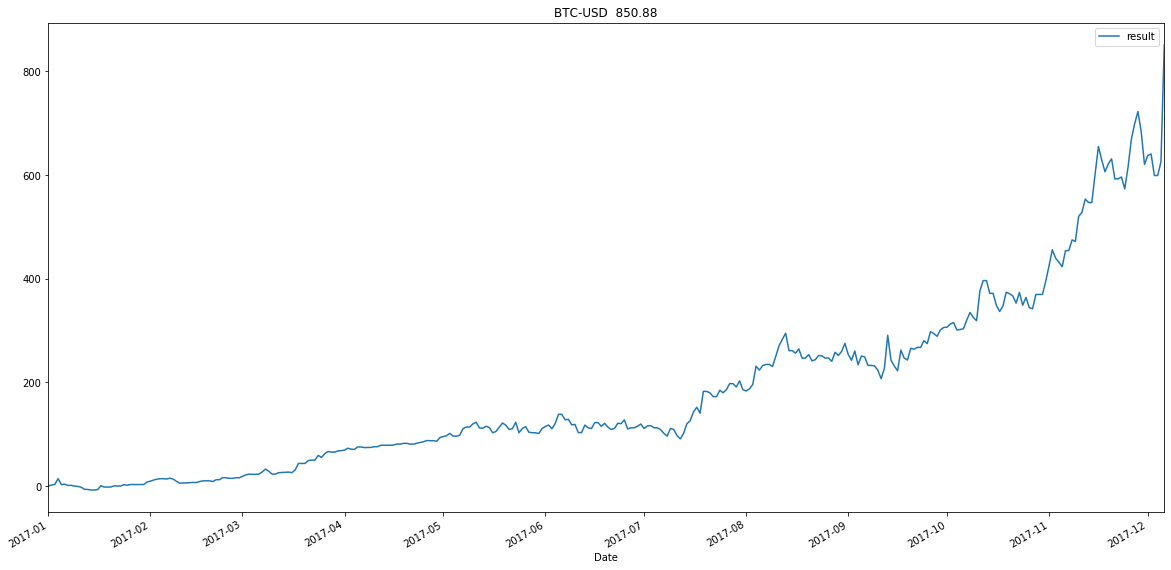

In [13]:
df['result'].plot(figsize=(20, 10), title=f'BTC-USD  {df["result"].iloc[-1]:.2f}', legend=True)